In [1]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from rich.console import Console

In [2]:
console = Console()

In [3]:
# define my graph state
class PortfolioState(TypedDict):
    amount_usd: float
    interest_rate: float
    total_usd: float
    usd_to_inr: float
    usd_to_eur: float
    target_currency: Literal["inr", "eur"]
    total: float

In [4]:
pf_usd_to_inr = PortfolioState(
    amount_usd=1000.0,
    interest_rate=1.08,
    total_usd=0.0,
    usd_to_inr=85.64,
    target_currency="inr",
    total=0.0,
)

In [5]:
pf_usd_to_eur = PortfolioState(
    amount_usd=1000.0,
    interest_rate=1.08,
    total_usd=0.0,
    usd_to_eur=0.85,
    target_currency="eur",
    total=0.0,
)

In [6]:
# node to calculate interest on usd investment
def calc_usd_with_interest(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * state["interest_rate"]
    console.print(
        f"[green]Amount USD:[/green] {state['amount_usd']},\n[green]Interest Rate:[/green] {state['interest_rate']},\n [green]Total USD:[/green] {state['total_usd']}"
    )
    return state

In [7]:
def covert_usd_to_inr(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * state["usd_to_inr"]
    console.print(
        f"Amount USD: {state['total_usd']:.3f}, \n Conv Rate: {state['usd_to_inr']:.3f}, \n Total in INR: {state['total']:.2f}"
    )
    return state

In [8]:
def covert_usd_to_eur(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * state["usd_to_eur"]
    console.print(
        f"Amount USD: {state['total_usd']:.3f}, \n Conv Rate: {state['usd_to_eur']:.3f}, \n Total in EUR: {state['total']:.2f}"
    )
    return state

In [9]:
def choose_conversion(state: PortfolioState) -> str:
    return state["target_currency"]

In [10]:
# build the graph

builder = StateGraph(PortfolioState)
builder.add_node("calc_usd_with_interest", calc_usd_with_interest)
builder.add_node("convert_usd_to_inr", covert_usd_to_inr)
builder.add_node("convert_usd_to_eur", covert_usd_to_eur)

# add edges
builder.add_edge(START, "calc_usd_with_interest")
builder.add_conditional_edges(
    "calc_usd_with_interest",
    choose_conversion,
    {
        "inr": "convert_usd_to_inr",
        "eur": "convert_usd_to_eur",
    },
)
builder.add_edge(["convert_usd_to_inr", "convert_usd_to_eur"], END)

graph = builder.compile()

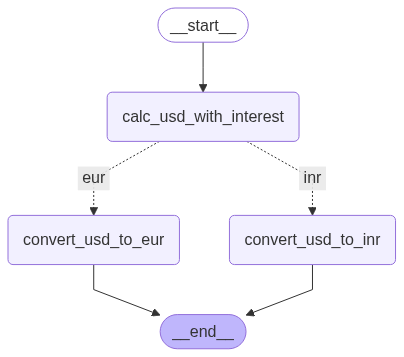

In [11]:
# display the graph
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
# convert USD to INR
console.print("[blue]Converting USD to INR[/blue]")
result = graph.invoke(pf_usd_to_inr)
console.print(result)

console.print("[yellow]Converting USD to EUR[/yellow]")
result = graph.invoke(pf_usd_to_eur)
console.print(result)

Converting USD to INR

Amount USD: 1000.0,
Interest Rate: 1.08,
 Total USD: 1080.0

Amount USD: 1080.000, 
 Conv Rate: 85.640, 
 Total in INR: 92491.20

{
    'amount_usd': 1000.0,
    'interest_rate': 1.08,
    'total_usd': 1080.0,
    'usd_to_inr': 85.64,
    'target_currency': 'inr',
    'total': 92491.2
}

Converting USD to EUR

Amount USD: 1000.0,
Interest Rate: 1.08,
 Total USD: 1080.0

Amount USD: 1080.000, 
 Conv Rate: 0.850, 
 Total in EUR: 918.00

{
    'amount_usd': 1000.0,
    'interest_rate': 1.08,
    'total_usd': 1080.0,
    'usd_to_eur': 0.85,
    'target_currency': 'eur',
    'total': 918.0
}